In [83]:
from prac_code.tables import start
start()

In [1]:
import pandas as pd
tab1 = pd.read_csv("tables/tab1.tab", sep="\t")
tab2 = pd.read_csv("tables/tab2.tab", sep="\t")
tab3 = pd.read_csv("tables/tab3.tab", sep="\t")
tab4 = pd.read_csv("tables/tab4.tab", sep="\t")

In [2]:
tab1

,f0,Vmax,f_m07,f_p07
0,7194,0.027,6881,7512
1,7182,0.027,6906,7491
2,7187,0.027,6900,7506


In [3]:
tab1["delta_f"] = tab1["f_p07"] - tab1["f_m07"]

In [4]:
tab1

,f0,Vmax,f_m07,f_p07,delta_f
0,7194,0.027,6881,7512,631
1,7182,0.027,6906,7491,585
2,7187,0.027,6900,7506,606


In [5]:
from prac_code.value import Value
tab1.append([{
    "f0": Value(syst=0.0, values=tab1["f0"]),
    "Vmax": Value(syst=0.0005, values=tab1["Vmax"]),
    "f_m07": Value(syst=0.0, values=tab1["f_m07"]),
    "f_p07": Value(syst=0.0, values=tab1["f_p07"]),
    "delta_f": Value(syst=0.0, values=tab1["f_p07"]) - Value(syst=0.0, values=tab1["f_m07"])
}], ignore_index=True)


,f0,Vmax,f_m07,f_p07,delta_f
0,7194,0.027,6881,7512,631
1,7182,0.027,6906,7491,585
2,7187,0.027,6900,7506,606
3,7188 ± 6,0.0270 ± 0.0005,6896 ± 13,7503 ± 11,607 ± 17


In [6]:
from pandas.core.series import Series
tab2["D"] = tab2["D"].apply(Value)
tab2["f01"] = Series([Value(syst=0.0, values=[tab2["f011"][i], tab2["f012"][i], tab2["f013"][i]]) for i in range(7)])
tab2["f02"] = Series([Value(syst=0.0, values=[tab2["f021"][i], tab2["f022"][i], tab2["f023"][i]]) for i in range(7)])

In [7]:
tab2

,D,f011,f012,f013,f021,f022,f023,f01,f02
0,0 ± 0,6366,6364,6364,8342,8334,8319,6364.7 ± 1.2,8332 ± 12
1,5 ± 0,6500,6496,6498,8062,8064,8064,6498 ± 2,8063.3 ± 1.2
2,10 ± 0,6643,6640,6646,7809,7811,7812,6643 ± 3,7810.7 ± 1.5
3,15 ± 0,6757,6742,6764,7662,7664,7679,6754 ± 11,7668 ± 9
4,20 ± 0,6840,6832,6832,7495,7488,7503,6835 ± 5,7495 ± 8
5,25 ± 0,6986,6928,6934,7232,7238,7283,6.95e+3 ± 3e+1,7.25e+3 ± 3e+1
6,30 ± 0,7056,7069,7045,7056,7069,7045,7057 ± 12,7057 ± 12


In [8]:
tab2["f0"] = 2**0.5 * tab2["f01"] * tab2["f02"] / (tab2["f01"]**2.0 + tab2["f02"]**2.0)**0.5

In [9]:
tab2

,D,f011,f012,f013,f021,f022,f023,f01,f02,f0
0,0 ± 0,6366,6364,6364,8342,8334,8319,6364.7 ± 1.2,8332 ± 12,7153 ± 4
1,5 ± 0,6500,6496,6498,8062,8064,8064,6498 ± 2,8063.3 ± 1.2,7155.3 ± 1.4
2,10 ± 0,6643,6640,6646,7809,7811,7812,6643 ± 3,7810.7 ± 1.5,7156.4 ± 2.0
3,15 ± 0,6757,6742,6764,7662,7664,7679,6754 ± 11,7668 ± 9,7168 ± 8
4,20 ± 0,6840,6832,6832,7495,7488,7503,6835 ± 5,7495 ± 8,7142 ± 4
5,25 ± 0,6986,6928,6934,7232,7238,7283,6.95e+3 ± 3e+1,7.25e+3 ± 3e+1,7.10e+3 ± 2e+1
6,30 ± 0,7056,7069,7045,7056,7069,7045,7057 ± 12,7057 ± 12,7057 ± 8


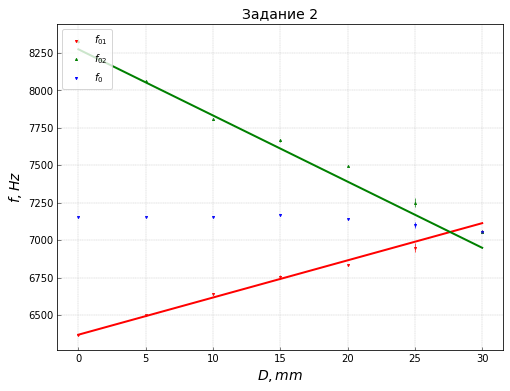

[FitParameters(legend='$f_{01}$', a=24.8380011153251, sigma_a=0.9994433786424354, b=6368.545079003989, sigma_b=6.154694091277709, r=0.9969393724780611),
 FitParameters(legend='$f_{02}$', a=-44.19629160237543, sigma_a=2.879276606689889, b=8275.056032979308, sigma_b=23.357599340531188, r=-0.9968265028197703)]

In [10]:
from prac_code.plotter import Plotter
Plotter(draw_legend=True).set_name("task2").set_title("Задание 2").set_y_name("$f, Hz$").set_x_name(
        "$D, mm$"). \
        add_line(Plotter.get_new_line(y_value=tab2['f01'], x_value=tab2["D"],
                                      draw_error=True, legend='$f_{01}$', fit=True, color='red', marker="v")).\
        add_line(Plotter.get_new_line(y_value=tab2['f02'], x_value=tab2["D"],
                                      draw_error=True, legend='$f_{02}$', fit=True, color='green', marker="^")).\
        add_line(Plotter.get_new_line(y_value=tab2['f0'], x_value=tab2["D"],
                                      draw_error=True, legend='$f_{0}$', fit=False, color='blue', marker="v")).\
        plot(show=True, save=True)

In [11]:
from math import pi
L = (1.0 / tab2["f0"] / (2 * pi))**2 / (0.47 * 10**-6)